In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
sympy.init_printing()

In [4]:
x

NameError: name 'x' is not defined

In [5]:
x = sympy.symbols('x')

In [6]:
x

In [7]:
5*x

In [8]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x-4*t)**2/(4*nu*(t+1)))+sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1))))
phi

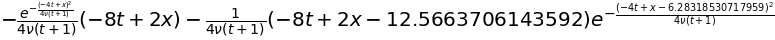

In [9]:
phiprime = phi.diff(x)
phiprime

In [10]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [11]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [12]:
u_lamb = lambdify((t,x,nu), u)
print('The value of u at t=1, x=4, nu=3 is {}'.format(u_lamb(1,4,3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494


In [13]:
#Initial conditions set previously, now: set up the problem
nx = 101 #No of spatial grid points
L = 2.0 * numpy.pi
dx = L/(nx-1)
nu = 0.07
nt = 100
sigma = 0.1
dt = sigma*dx**2/nu #Time step size

#Discretize the domain
x = numpy.linspace(0.0, L, num=nx)

In [14]:
#Set initial conditions
t = 0.0
u0 = numpy.array([u_lamb(t, xi, nu) for xi in x])
u0

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

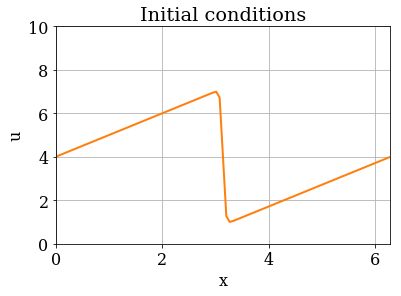

In [15]:
#Plot the initial conditions
pyplot.figure(figsize=(6.0,4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C1', linestyle='-', linewidth=2)
pyplot.xlim(0.0,L)
pyplot.ylim(0.0, 10.0)

In [16]:
#We need to implement burgers equation with periodic boundary conditions
#Integrate the Burger's equation in time
u = u0.copy()
for n in range(nt):
    un = u.copy()
    #Update all interior points
    u[1:-1] = (un[1:-1]-un[1:-1]*dt/dx*(un[1:-1]-un[:-2])+nu*dt/dx**2*(un[2:]-2*un[1:-1]+un[:-2]))
    # Update boundary points.
    u[0] = (un[0] - un[0] * dt / dx * (un[0] - un[-1]) + nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] - un[-1] * dt / dx * (un[-1] - un[-2]) + nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))

In [17]:
#Compute the analytical solution
u_analytical = numpy.array([u_lamb(nt*dt, xi, nu) for xi in x])

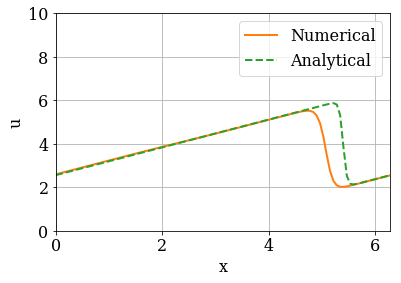

In [18]:
#Plot the numerical solution along with the analytical solution
pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u, label='Numerical', color='C1', linestyle='-', linewidth=2)
pyplot.plot(x, u_analytical, label='Analytical', color='C2', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0);


In [19]:
def burgers(u0, dx, dt, nu, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        #Update all interior points
        u[1:-1] = (un[1:-1]-un[1:-1]*dt/dx*(un[1:-1]-un[:-2])+nu*dt/dx**2*(un[2:]-2*un[1:-1]+un[:-2]))
        # Update boundary points.
        u[0] = (un[0] - un[0] * dt / dx * (un[0] - un[-1]) + nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
        u[-1] = (un[-1] - un[-1] * dt / dx * (un[-1] - un[-2]) + nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))
        u_hist.append(u.copy())
    return u_hist

In [20]:
#Compute the history of the numerical solution
u_hist = burgers(u0, dx, dt, nu, nt=nt)

In [21]:
#Compute the history of analytical solution:
u_analytical = [numpy.array([u_lamb(n*dt, xi, nu) for xi in x])for n in range(nt)]

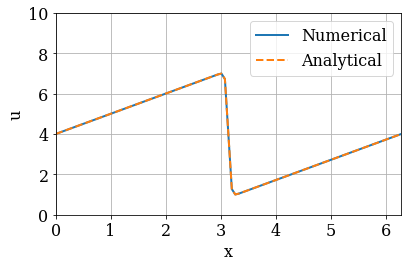

In [22]:
fig = pyplot.figure(figsize=(6.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
u0_analytical = numpy.array([u_lamb(0.0, xi, nu) for xi in x])
line1 = pyplot.plot(x, u0, label='Numerical',color='C0', linestyle='-', linewidth=2)[0]
line2 = pyplot.plot(x, u0_analytical, label='Analytical',color='C1', linestyle='--', linewidth=2)[0]
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 10.0)
fig.tight_layout()

In [23]:
def update_plot(n, u_hist, u_analytical):
    fig.subtitle('Time step {:0>2}'.format(n))
    line1.set_ydata(u_hist[n])
    line2.set_ydata(u_analytical[n])

In [27]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(u_hist, u_analytical), interval=100)

NameError: name 'animation' is not defined

In [28]:
%%timeit

u = numpy.array([u_lamb(t, x0, nu) for x0 in x])

for n in range(nt):
    un = u.copy()
    # Update all interior points and the left boundary point.
    for i in range(nx - 1):
        u[i] = (un[i] -
                un[i] * dt / dx *(un[i] - un[i - 1]) +
                nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1]))
    # Update the right boundary.
    u[-1] = (un[-1] -
             un[-1] * dt / dx * (un[-1] - un[-2]) +
             nu * dt / dx**2 * (un[0]- 2 * un[-1] + un[-2]))



20.3 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%%timeit

u = numpy.array([u_lamb(t, xi, nu) for xi in x])

for n in range(nt):
    un = u.copy()
.
    u[1:-1] = (un[1:-1] -
               un[1:-1] * dt / dx * (un[1:-1] - un[:-2]) +
               nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
  
    u[0] = (un[0] -
            un[0] * dt / dx * (un[0] - un[-1]) +
            nu * dt / dx**2 * (un[1] - 2 * un[0] + un[-1]))
    u[-1] = (un[-1] -
            un[-1] * dt / dx * (un[-1] - un[-2]) +
            nu * dt / dx**2 * (un[0] - 2 * un[-1] + un[-2]))

2.26 ms ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
